In [1]:
%load_ext line_profiler

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [94]:
#raw_data = pd.read_csv(r"C:\Users\Conor\Google Drive\Work_Prioritisation\Work_prior_raw.csv")

#raw_data = pd.read_csv(r"C:\Users\C\Google Drive\Work_Prioritisation\Work_prior_raw.csv")

raw_data = pd.read_csv(r"/home/conor/Desktop/Work_prior_raw.csv")

Preprocess some of the input data

In [96]:
raw_data = raw_data[np.isnan(raw_data["Likelihood"]) == True]

In [97]:
def label(row):
    
    for row_name in ["MTBF","Deadline"]:

        if np.isnan(row[row_name]) == False:
            
            return row_name

Use the above function to fill in the type of job

In [98]:
raw_data["Type"] = raw_data.apply(lambda row: label(row), axis = 1)

/home/conor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Fill in the SD of the cumulative distribution before hand to allow for faster calculation of probability using vector operations

In [99]:
raw_data["SD"] = [50 if type_== "MTBF" else 1e-5 for type_ in raw_data["Type"]]

/home/conor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Combine the MTBF and deadline columns to make a single column, this makes computation more efficient.

In [100]:
# Can't think of a snappy name for this column, but it's either the MTBF Or the deadline for the job.

raw_data["MTBF/Deadline"] = raw_data["MTBF"].combine(raw_data["Deadline"], lambda x1, x2: x1 if np.isnan(x1)==False else x2)

/home/conor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
raw_data

,Order,Consequence,Likelihood,Deadline,MTBF,Cost of repair,Duration,Type,SD,MTBF/Deadline
47,48,18590,NaN,176.0,NaN,3097.081135,1,Deadline,0.00001,176.0
48,49,19986,NaN,185.0,NaN,3600.438218,5,Deadline,0.00001,185.0
49,50,22041,NaN,112.0,NaN,2646.743022,10,Deadline,0.00001,112.0
50,51,34797,NaN,87.0,NaN,1007.496454,10,Deadline,0.00001,87.0
51,52,16362,NaN,158.0,NaN,3639.369269,4,Deadline,0.00001,158.0
52,53,36267,NaN,108.0,NaN,187.145287,2,Deadline,0.00001,108.0
53,54,36015,NaN,103.0,NaN,4467.237819,6,Deadline,0.00001,103.0
54,55,46615,NaN,168.0,NaN,1812.210808,5,Deadline,0.00001,168.0
55,56,41495,NaN,111.0,NaN,4499.907659,9,Deadline,0.00001,111.0
56,57,48714,NaN,173.0,NaN,4315.963662,5,Deadline,0.00001,173.0


In [91]:
def evaluate(individual):
    
    # Resets the data back to the original input
    data = raw_data

    # Takes the index of the data and orders it according to the given solution
    #data = individual
    data["Order"] = individual
        
    print(data.head(20))
    
    
    # Sorts the data based on the new order
    #data.sort_index(axis = 0, level = "Order", ascending = False, kind = "bubblesort")
    data.sort_values("Order", ascending = True, inplace = True)
    
    print(data.head(20))

    
    # Fills in the start dates for each job given the duration and order
    data["Start"] = [np.sum(data["Duration"].iloc[:x-1]) if x > 0 else 0 for x in range(data["Duration"].shape[0])]
    
    # Doing vector operations with raw numpy arrays seems to be faster
    data["End"] = data["Start"].values + data["Duration"].values
    
    # Calculations the cost of each of the jobs given the current order
    data["Cost"] = data["Consequence"].values * stats.norm.cdf(data["End"].values, data["MTBF/Deadline"].values, scale = data["SD"].values)
    #data["Cost"] = data.apply(lambda row: cost_calculation(row), axis = 1)
    
    # Sums the cost column to give the total amount and returns.    
    return (data["Cost"].values.sum(),)
    

In [92]:
evaluate(np.random.permutation(raw_data.Order.shape[0]))

    Order  Consequence  Likelihood  Deadline   MTBF  Cost of repair  Duration  \
16     38        32137         NaN       9.0    NaN      876.996880         1   
45      2        41318         NaN       NaN  151.0     2210.632161         6   
24     23        35841         NaN       NaN  157.0      676.785431         3   
23     36        23650         NaN       NaN  191.0      422.819275         6   
13     25        19986         NaN     185.0    NaN     3600.438218         5   
29     37        10537         NaN       NaN  217.0     2404.383651        10   
4       8        41276         NaN       NaN  154.0      541.439138         7   
9      17        36279         NaN       NaN   89.0      550.734598         7   
25     10        48123         NaN      89.0    NaN     4884.841133         0   
44      4        25100         NaN     171.0    NaN     3829.271591         0   
38     24        48714         NaN     173.0    NaN     4315.963662         5   
11     13        55510      

(556715.0473261754,)

In [16]:
%%timeit

evaluate(np.random.permutation(raw_data.Order.shape[0]))

11.9 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Profile the cost function to find bottlenecks

In [ ]:
%lprun -f evaluate evaluate(np.random.permutation(raw_data.Order.shape[0]))

No longer used

def cost_calculation(row):
    
    cost_functions = {"MTBF": MTBF
                     ,"Deadline": Deadline
                     ,"Likelihood": Likelihood}
    
    for row_name in cost_functions.keys():

        if np.isnan(row[row_name]) == False:
            
            cost = cost_functions[row_name](row)
            
            return cost

def MTBF(row):
    
    return row["Consequence"] * stats.norm.cdf(row["End"], row["MTBF"], scale = 50)

    #return (((row["End"] - row["MTBF"]) * row["Consequence"]) * stats.norm.cdf(row["MTBF"], loc = row["End"], scale = 50))

def Deadline(row):
    
    return row["Consequence"] * stats.norm.cdf(row["End"], row["Deadline"], scale = 1e-5)
    
    return (row["End"] - row["Deadline"]) * row["Consequence"]

def Likelihood(row):
    
    # todo: convert likelihood to frequency and use as MTBF.
    
    return row["Consequence"] * stats.norm.cdf(row["End"])
    
    return row["Likelihood"] * row["Consequence"] 

# Genetic Algorithms bit

In [17]:
from deap import algorithms, base, creator, tools

In [50]:
toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox.register("indices", np.random.permutation, raw_data.shape[0])
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 0.05)

toolbox.register("evaluate", evaluate)

toolbox.register("select", tools.selTournament, tournsize = 3)

/home/conor/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/conor/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Supplies a dictionary of different statistics to be collected from the population fitnesses.

In [51]:
statistics = {"Avg": np.mean,
              "Std": np.std,
              "Max": np.max,
              "Min": np.min}


fit_stats = tools.Statistics(key=lambda ind: ind.fitness.values)

for Name, func in statistics.items():
    
    fit_stats.register(Name, func)

Initiate the genetic algorithm with however many generations you want.

In [52]:
pop = toolbox.population(n = 100)

result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb = 0.8, mutpb = 0.2,
                             ngen = 100, verbose = False,
                             stats = fit_stats)

Analysis of results

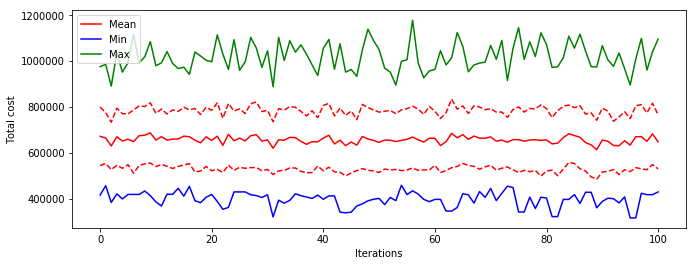

In [62]:
plt.figure(figsize=(11, 4))

plt.plot(log.select("Avg"), label = "Mean", c  = "r")

plt.plot(np.add(log.select("Avg"),log.select("Std")),c  = "r", linestyle = "--")
plt.plot(np.subtract(log.select("Avg"),log.select("Std")), c  = "r", linestyle = "--")

plt.plot(log.select("Min"), label = "Min", c  = "b")
plt.plot(log.select("Max"), label = "Max", c  = "g")

plt.legend()
plt.ylabel('Total cost')
plt.xlabel('Iterations');
plt.show()

Select best individual and compute results

In [63]:
best_individual = tools.selBest(result, k=1)[0]

In [64]:
best_data = raw_data

best_data.index = best_individual
best_data.sort_values("Start")
#data.sort_index(axis = 0, level = "Order", ascending = True, kind = "bubblesort")

print(best_data.Cost.sum())

609476.5923953686


In [66]:
best_data

,Order,Consequence,Likelihood,Deadline,MTBF,Cost of repair,Duration,Type,SD,MTBF/Deadline,Start,End,Cost
24,49,35841,NaN,NaN,157.0,676.785431,3,MTBF,50.00000,157.0,0,3,37.095542
1,48,41495,NaN,111.0,NaN,4499.907659,9,Deadline,0.00001,111.0,0,9,0.000000
43,47,32144,NaN,NaN,180.0,1173.963623,6,MTBF,50.00000,180.0,3,9,10.064469
12,46,42367,NaN,NaN,141.0,1199.246708,0,MTBF,50.00000,141.0,12,12,209.293648
40,45,18396,NaN,NaN,122.0,2236.989525,5,MTBF,50.00000,122.0,18,23,438.777057
38,44,48714,NaN,173.0,NaN,4315.963662,5,Deadline,0.00001,173.0,18,23,0.000000
47,43,35951,NaN,NaN,111.0,1444.082285,7,MTBF,50.00000,111.0,23,30,1891.602794
18,42,59916,NaN,177.0,NaN,4617.982657,5,Deadline,0.00001,177.0,28,33,0.000000
6,41,6779,NaN,NaN,103.0,1894.598593,0,MTBF,50.00000,103.0,35,35,589.196527
48,40,56755,NaN,NaN,192.0,3938.915157,3,MTBF,50.00000,192.0,40,43,81.797685
